In [1]:
import numpy as np
import scipy.io
import glob
#from scipy import misc
from skimage import io
import matplotlib.pyplot as plt
from displaySIFTPatches import displaySIFTPatches
from selectRegion import roipoly
from getPatchFromSIFTParameters import getPatchFromSIFTParameters
from skimage.color import rgb2gray
import matplotlib.cm as cm
import pylab as pl
import pdb
from sklearn.cluster import KMeans, MiniBatchKMeans
from collections import Counter
import operator
import joblib
#from sklearn.externals import joblib
import glob

from utils import bag_of_words_histogram, calc_similarity_score, get_rows_cols, plot_images_grid

In [2]:
import scipy.stats as st

In [3]:
from utils import create_idf

In [4]:
%load_ext autoreload
%autoreload 2

In [8]:
create_idf(model, sift_dir)

{0: 3.2095087825158317,
 1: 1.646232911844894,
 2: 0.7889735834448319,
 3: 1.270604859910406,
 4: 2.285727378912519,
 5: 0.38295177543919706,
 6: 0.806160190136148,
 7: 1.2733126871809919,
 8: 0.28687284724071843,
 9: 0.3233228825523453,
 10: 3.372470092025245,
 11: 1.53107799859478,
 12: 0.7839744062278005,
 13: 3.622521096259379,
 14: 3.0596638143997854,
 15: 1.0484352819430356,
 16: 0.6390799592896695,
 17: 0.5133079574199038,
 18: 0.3652990663828297,
 19: 0.8711066802737342,
 20: 0.9390120040732867,
 21: 0.4444672659114335,
 22: 0.7990475437239657,
 23: 0.3670503803155647,
 24: 3.3993775449451693,
 25: 0.18670272480951763,
 26: 0.26685215850982164,
 27: 0.5133079574199038,
 28: 0.39594770112127414,
 29: 1.8317090453873641,
 30: 1.4993073706960933,
 31: 0.24916996893487228,
 32: 1.6557266540371451,
 33: 3.7367592859492227,
 34: 2.317572374593441,
 35: 0.45733377650468376,
 36: 0.39730179746900346,
 37: 0.4425751177593957,
 38: 0.5494595833692714,
 39: 0.7013776796964607,
 40: 1.1951

In [5]:
frames_dir='PS4Frames/frames/'
sift_dir='PS4SIFT/sift/'
mat_paths = glob.glob(sift_dir + '*.mat')
seed=365

In [29]:
model = joblib.load('kmeans_k=2000_isr=04_dsr=04.sav')
label_count = Counter(model.labels_)

In [83]:
pct = 1
multiple = st.norm.ppf((1 - pct) / 2 + pct)
#multiple = st.norm.ppf(pct)

In [84]:
multiple

inf

In [85]:
cutoff = np.mean(list(label_count.values())) + multiple * np.std(list(label_count.values()))
stop_list = [i for i in label_count.keys() if label_count[i] > cutoff]
joblib.dump(stop_list, f'stop_list_{pct}.pkl')

['stop_list_1.pkl']

In [86]:
len(stop_list)

0

In [87]:
np.log(6671)

8.805525052709516

In [82]:
2000 * (1 - pct)

0.19999999999997797

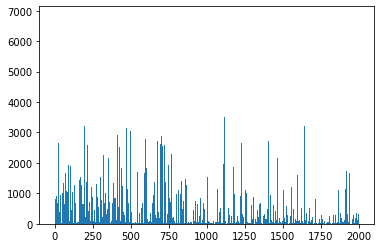

In [35]:
h = plt.hist(model.labels_, bins=2000)

In [34]:
len(label_count.keys())

2000

In [33]:
max(label_count.values())

6803

In [16]:
cutoff

2389.32109743331

In [30]:
np.mean(list(label_count.values()))

594.573

In [10]:
doc_freq_counts = {i: 0 for i in range(2000)}
doc_count = 0

for mat_path in mat_paths:
        
    mat = scipy.io.loadmat(mat_path, verify_compressed_data_integrity=False)
    
    try:
        for i in set(model.predict(mat['descriptors'])):
            doc_freq_counts[i] += 1
    except ValueError:
        continue
        
    doc_count += 1

In [ ]:
mat1 = scipy.io.loadmat(mat_path, verify_compressed_data_integrity=False)

In [11]:
idf = {key: np.log(doc_count/(1 + value)) for key, value in doc_freq_counts.items()}
#joblib.dump(idf, 'idf_k=2000.pkl')

In [178]:
mat = scipy.io.loadmat(mat_paths[4], verify_compressed_data_integrity=False)
labels = model.predict(mat['descriptors'])
filtered_labels = [label for label in labels if label not in stop_list]
hist1, _ = np.histogram(filtered_labels, range(model.n_clusters+1))
hist1 = hist1 / np.sum(hist1)
weights1 = np.array([hist1[key] * val for key, val in idf.items()])

In [179]:
mat = scipy.io.loadmat(mat_paths[454], verify_compressed_data_integrity=False)
labels = model.predict(mat['descriptors'])
filtered_labels = [label for label in labels if label not in stop_list]
hist2, _ = np.histogram(filtered_labels, range(model.n_clusters+1))
hist2 = hist2 / np.sum(hist2)
weights2 = np.array([hist2[key] * val for key, val in idf.items()])

In [171]:
calc_similarity_score(weights1, weights2)

0.3271634193626307

In [180]:
len(hist1)

2000

In [175]:
mat = scipy.io.loadmat(mat_paths[4], verify_compressed_data_integrity=False)
hist1, _ = bag_of_words_histogram(model, mat['descriptors'])

In [176]:
mat = scipy.io.loadmat(mat_paths[454], verify_compressed_data_integrity=False)
hist2, _ = bag_of_words_histogram(model, mat['descriptors'])

In [177]:
calc_similarity_score(hist1, hist2)

0.566978538086642

In [181]:
len(hist1)

2000

In [80]:
#model = joblib.load(model_name)

#top_scores = np.zeros((n_frames, top_m))
#top_image_names = [['none']*top_m for _ in range(n_frames)]
total_descriptors = 0


    except ValueError:
        continue
        
    total_descriptors += (mat['numfeats'][0][0])

In [81]:
total_descriptors

7391458

In [76]:
total_descriptors

array([51426], dtype=uint16)

In [6]:
fnames = glob.glob(sift_dir + '*.mat')
fnames = [i[-27:] for i in fnames]
n_imgs = len(fnames)
n_sampled_imgs = int(n_imgs * im_sample_rate)
img_idxs = np.random.choice(n_imgs, n_sampled_imgs, replace=False)
descriptors = np.zeros((1, 128))
orients = np.zeros((1, 1))
positions = np.zeros((1, 2))
scales = np.zeros((1, 1))
images = []

if seed:
    np.random.seed(seed)

print('Sampling descriptors...')

for idx in img_idxs:
    fname = sift_dir + fnames[idx]
    try:
        mat = scipy.io.loadmat(fname)
    except ValueError:
        continue
    n_desc = len(mat['descriptors'])
    n_sampled_desc = int(n_desc * desc_sample_rate)
    desc_idxs = np.random.choice(n_desc, n_sampled_desc, replace=False)
    descriptors = np.append(descriptors, mat['descriptors'][desc_idxs], axis=0)
    orients = np.append(orients, mat['orients'][desc_idxs], axis=0)
    positions = np.append(positions, mat['positions'][desc_idxs], axis=0)
    scales = np.append(scales, mat['scales'][desc_idxs], axis=0)
    images += [fnames[idx][:-4]] * n_sampled_desc

descriptors = descriptors[1:]
orients = orients[1:]
positions = positions[1:]
scales = scales[1:]
images = np.array(images)

Sampling descriptors...
Training model...


FileNotFoundError: [Errno 2] No such file or directory: ''

In [58]:
model = joblib.load('kmeans_k=1500.sav')
labels = model.predict(descriptors)

In [59]:
label_count = Counter(labels)

In [ ]:
i = 10

In [68]:
len(stop_95)

74

In [35]:
y_95 = [label_count[i] for i in range(1500) if label_count[i] < pct_95]
y_99 = [label_count[i] for i in range(1500) if label_count[i] < pct_99]

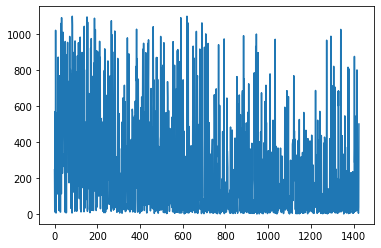

In [36]:
plt.plot(range(len(y_95)), y_95)

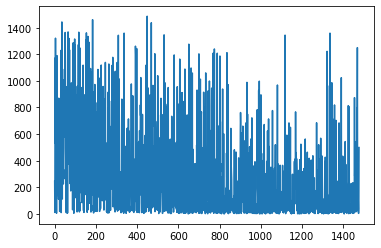

In [37]:
plt.plot(range(len(y_99)), y_99)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0ba547d450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0ba547de90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0ba546b810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ba53c9910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ba53c9e10>],
 'means': []}

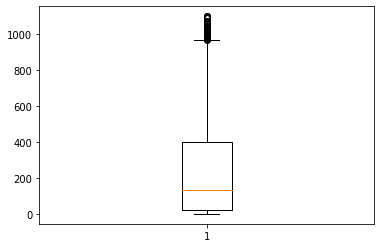

In [38]:
plt.boxplot(y_95)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0bc5de1250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0bc5de1890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0bc5dc26d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bc5f7a290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bc5e1f090>],
 'means': []}

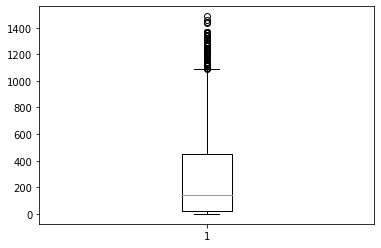

In [39]:
plt.boxplot(y_99)

In [40]:
len(y_95)

1426

In [41]:
len(y_99)

1478

In [42]:
len(label_count.values())

1494

In [ ]:
plt.plot()

(array([ 0., 11., 13., ...,  0.,  0.,  0.]),
 array([   0,    1,    2, ..., 1497, 1498, 1499]),
 <a list of 1499 Patch objects>)

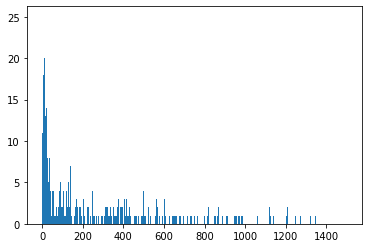

In [16]:
plt.hist(label_count.values(), bins=range(1500))

In [10]:
label_count

Counter({399: 1701,
         102: 1049,
         311: 994,
         1106: 375,
         639: 554,
         308: 1072,
         99: 1540,
         1447: 814,
         1165: 651,
         425: 541,
         1297: 1915,
         331: 50,
         553: 430,
         1335: 426,
         148: 1118,
         721: 139,
         883: 1961,
         252: 452,
         123: 1272,
         487: 1437,
         49: 1008,
         742: 669,
         1344: 1222,
         946: 222,
         484: 853,
         855: 1212,
         919: 293,
         856: 139,
         322: 191,
         559: 704,
         890: 2513,
         58: 495,
         194: 668,
         471: 947,
         92: 739,
         282: 658,
         203: 1546,
         931: 563,
         491: 539,
         14: 1768,
         808: 1208,
         495: 966,
         17: 285,
         748: 732,
         625: 1164,
         442: 182,
         763: 925,
         791: 3160,
         794: 1240,
         923: 762,
         858: 205,
         137:

In [61]:
model = joblib.load(model_name)

In [63]:
model.labels_

array([1249,  441, 1038, ..., 1165, 1336,  441], dtype=int32)

In [67]:
model.predict(np.random.rand(128).reshape(1, -1))

array([1399], dtype=int32)

In [68]:
model.labels

AttributeError: 'MiniBatchKMeans' object has no attribute 'labels'

In [16]:
qry_frames=None
n_frames=3
top_m=5
model_name='kmeans_k=1500.sav'
frames_dir='PS4Frames/frames/'
sift_dir='PS4SIFT/sift/'
seed=24

In [69]:
np.random.seed(seed)

model = joblib.load(model_name)

mat_paths = glob.glob(sift_dir + '*.mat')
#mat_files = [i[-27:] for i in mat_files]

top_scores = np.zeros((n_frames, top_m))
#top_images = np.array([['none']*top_m for _ in range(n_frames)])
top_images = [['none']*top_m for _ in range(n_frames)]


if qry_frames is None:

    frame_idxs = np.random.choice(len(mat_paths), n_frames, replace=False)
    qry_frames = [mat_paths[idx] for idx in frame_idxs]

for i, qry_frame in enumerate(qry_frames):

    mat = scipy.io.loadmat(qry_frame)
    hist1, bins1 = bag_of_words_histogram(model, mat['descriptors'])

    for mat_path in mat_paths[:50]:

        try:
            mat = scipy.io.loadmat(mat_path)
        except ValueError:
            #print(mat_path)
            continue
        try:
            hist2, bins2 = bag_of_words_histogram(model, mat['descriptors'])
        except ValueError:
            #print(mat_path)
            #print(mat)
            #print('-'*20)
            continue

        sim_score = calc_similarity_score(hist1, hist2)

        if any(sim_score > top_scores[i]):

            top_scores[i][0] = sim_score
            top_images[i][0] = mat_path[-27:-4]
            top_images[i] = list(np.array(top_images[i])[np.argsort(top_scores[i])])
            #top_images[i] = top_images[i][np.argsort(top_scores[i])]
            top_scores[i] = np.sort(top_scores[i])

In [73]:
[[qry_frame[-27:-4]] for qry_frame in qry_frames]

[['friends_0000000928.jpeg'],
 ['friends_0000001481.jpeg'],
 ['friends_0000002442.jpeg']]

In [80]:
qry_frames[i][-27:-4]

'friends_0000002442.jpeg'

In [84]:
[[image[-9:] for image in row] for row in top_images]

[['5353.jpeg', '1524.jpeg', '2316.jpeg', '1549.jpeg', '0923.jpeg'],
 ['5353.jpeg', '3411.jpeg', '1175.jpeg', '2668.jpeg', '2654.jpeg'],
 ['5353.jpeg', '1175.jpeg', '2368.jpeg', '4858.jpeg', '5046.jpeg']]

In [81]:
[[qry_frames[i][-27:-4]] + top_images[i] for i in range(3)]

[['friends_0000000928.jpeg',
  'friends_0000005353.jpeg',
  'friends_0000001524.jpeg',
  'friends_0000002316.jpeg',
  'friends_0000001549.jpeg',
  'friends_0000000923.jpeg'],
 ['friends_0000001481.jpeg',
  'friends_0000005353.jpeg',
  'friends_0000003411.jpeg',
  'friends_0000001175.jpeg',
  'friends_0000002668.jpeg',
  'friends_0000002654.jpeg'],
 ['friends_0000002442.jpeg',
  'friends_0000005353.jpeg',
  'friends_0000001175.jpeg',
  'friends_0000002368.jpeg',
  'friends_0000004858.jpeg',
  'friends_0000005046.jpeg']]

In [71]:
qry_frames

['PS4SIFT/sift/friends_0000000928.jpeg.mat',
 'PS4SIFT/sift/friends_0000001481.jpeg.mat',
 'PS4SIFT/sift/friends_0000002442.jpeg.mat']

In [70]:
top_images

[['friends_0000005353.jpeg',
  'friends_0000001524.jpeg',
  'friends_0000002316.jpeg',
  'friends_0000001549.jpeg',
  'friends_0000000923.jpeg'],
 ['friends_0000005353.jpeg',
  'friends_0000003411.jpeg',
  'friends_0000001175.jpeg',
  'friends_0000002668.jpeg',
  'friends_0000002654.jpeg'],
 ['friends_0000005353.jpeg',
  'friends_0000001175.jpeg',
  'friends_0000002368.jpeg',
  'friends_0000004858.jpeg',
  'friends_0000005046.jpeg']]

In [45]:
top_images = [[io.imread(frames_dir + im_file) for im_file in row] for row in top_images]

In [46]:
qry_images = [[io.imread(frames_dir + qry_frame[-27:-4])] for qry_frame in qry_frames]

In [27]:
all_images = [[qry_images[i]] + top_images[i]] for i in range(n_frames)]

In [55]:
all_images = [qry_images[i] + top_images[i] for i in range(n_frames)]

In [56]:
len(all_images)

3

In [57]:
len(all_images[0])

6

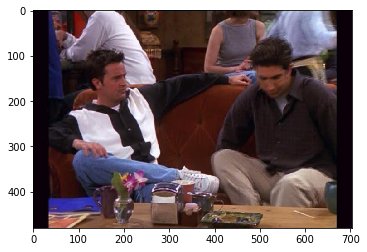

In [58]:
for row in all_images:
    for im in row:
        plt.imshow(im)

In [60]:
all_images[0][0]

Array([[[11,  0,  9],
        [11,  0,  9],
        [11,  0,  9],
        ...,
        [11,  0,  9],
        [11,  0,  9],
        [11,  0,  9]],

       [[11,  0,  9],
        [11,  0,  9],
        [11,  0,  9],
        ...,
        [11,  0,  9],
        [11,  0,  9],
        [11,  0,  9]],

       [[11,  0,  9],
        [11,  0,  9],
        [11,  0,  9],
        ...,
        [11,  0,  9],
        [11,  0,  9],
        [11,  0,  9]],

       ...,

       [[11,  0,  9],
        [11,  0,  9],
        [11,  0,  9],
        ...,
        [11,  0,  9],
        [11,  0,  9],
        [11,  0,  9]],

       [[11,  0,  9],
        [11,  0,  9],
        [11,  0,  9],
        ...,
        [11,  0,  9],
        [11,  0,  9],
        [11,  0,  9]],

       [[11,  0,  9],
        [11,  0,  9],
        [11,  0,  9],
        ...,
        [11,  0,  9],
        [11,  0,  9],
        [11,  0,  9]]], dtype=uint8)

In [40]:
top_images = np.array(top_images)
qry_images = np.array(qry_images)

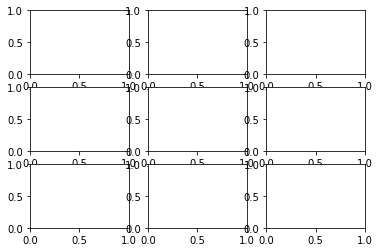

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3)

In [15]:
ax = axes.flatten()[0]

In [16]:
ax.imshow??

In [20]:
def test_fstring(name=f'test{j}'):
    j = 0
    print(name)

NameError: name 'j' is not defined

In [21]:
test_fstring()

test1


In [ ]:
axes.flatten()[0].imshow

In [23]:
def multiply(a):
    return 2 * a

In [2]:
a = np.array([[1, 4], [3, 6]])

In [22]:
b = [[1, 4], [3, 6], [5, 7]]

In [27]:
c = [[8], [9], [0]]

In [32]:
[[c[i] + b[i]] for i in range(3)]

[[[8, 1, 4]], [[9, 3, 6]], [[0, 5, 7]]]

In [26]:
[[multiply(x) for x in r] for r in b]

[[2, 8], [6, 12], [10, 14]]

In [8]:
for i, row in enumerate(a):
    print(i, row)

0 [1 4]
1 [3 6]


In [9]:
for i, row in enumerate(b):
    print(i, row)

0 [1, 4]
1 [3, 6]


In [3]:
b = ['a', 'c', 'g', 'e', 'b']

In [8]:
b.sort(key=list(np.argsort(a)))

TypeError: 'list' object is not callable

In [2]:
np.random.seed(24)

In [3]:
frames_dir = 'PS4Frames/frames/'
sift_dir = 'PS4SIFT/sift/'

k = 1500
im_sample_rate = 0.25
desc_sample_rate = 0.25
n_patches = 25

fnames = glob.glob(sift_dir + '*.mat')
fnames = [i[-27:] for i in fnames]

In [5]:
frame_idxs = np.random.choice(len(fnames), 3, replace=False)

In [23]:
model = joblib.load('kmeans_k=1500.sav')

In [71]:
class Match(object):
    
    def __init__(self, path, score):
        
        self.path = path
        self.score = score
        
    def __gt__(self, match2):
    
        return self.score > match2.score

In [72]:
match1 = Match('test', 3)
match2 = Match('test', 4)

In [74]:
match1 < match2

True

In [78]:
top_matches = [Match('test', 3), Match('test', 3), Match('test', 6), Match('test', 4)]

In [79]:
top_matches.pop(-1)

In [89]:
x = np.array([1, 3, 6, 4])

In [90]:
y = ['a', 'c' 'e', 'b']

In [91]:
y[np.argsort(x)]

TypeError: only integer scalar arrays can be converted to a scalar index

In [108]:
np.sort(x)

array([1, 3, 4, 6])

In [109]:
x

array([1, 3, 6, 4])

In [92]:
a = np.zeros((3, 5))

In [111]:
x

array([1, 3, 6, 4])

In [112]:
np.concatenate([[3], x])

array([3, 1, 3, 6, 4])

In [94]:
a[0][0] = 'x'

ValueError: could not convert string to float: 'x'

In [101]:
s = np.array([['none']*5 for _ in range(3)])

In [102]:
s[0, 0] = 'hllo'

In [106]:
s[0][:4][np.argsort(x)]

array(['hllo', 'none', 'none', 'none'], dtype='<U4')

In [76]:
Match('test', 5) > np.array([Match('test', 3), Match('test', 3), Match('test', 6), Match('test', 4)])

AttributeError: 'numpy.ndarray' object has no attribute 'score'

In [77]:
type(np.array([Match('test', 3), Match('test', 3), Match('test', 6), Match('test', 4)]))

numpy.ndarray

In [39]:
def bag_of_words_histogram(model, descriptors):
    
    return np.histogram(model.predict(mat['descriptors']), range(model.n_clusters))

In [52]:
def similarity_score(hist1, hist2):
    
    return np.dot(hist1, hist2) / (np.sqrt(np.sum(hist1**2)) * np.sqrt(np.sum(hist2**2)))

In [65]:
any(3 > np.array([4, 5, 3, 3, 6]))

False

In [115]:
mat = scipy.io.loadmat('PS4SIFT/sift/friends_0000000157.jpeg.mat')

ValueError: Did not fully consume compressed contents of an miCOMPRESSED element. This can indicate that the .mat file is corrupted.

In [114]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Oct 27 22:25:27 2008',
 '__version__': '1.0',
 '__globals__': [],
 'descriptors': array([], shape=(0, 128), dtype=uint8),
 'orients': array([], shape=(0, 1), dtype=uint8),
 'scales': array([], shape=(0, 1), dtype=uint8),
 'positions': array([], shape=(0, 2), dtype=uint8),
 'numfeats': array([[0]], dtype=uint8),
 'corners': array([], shape=(0, 0), dtype=object),
 'imname': array(['friends_0000004919.jpeg'], dtype='<U23')}

In [42]:
i = 0
fname = sift_dir + fnames[frame_idxs[i]]
mat = scipy.io.loadmat(fname)

# imname = frames_dir + fnames[frame_idxs[i]][:-4]
# im = io.imread(imname)

hist1, bins1 = bag_of_words_histogram(model, mat['descriptors'])

In [56]:
i = 2
fname = sift_dir + fnames[frame_idxs[i]]
mat = scipy.io.loadmat(fname)

imname = frames_dir + fnames[frame_idxs[i]][:-4]
im = io.imread(imname)

hist2, bins2 = bag_of_words_histogram(model, mat['descriptors'])

In [53]:
similarity_score(hist1, hist2)

0.30236838983172937

In [55]:
similarity_score(hist1, hist2)

0.3089975247991945

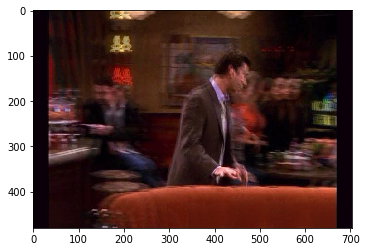

In [57]:
plt.imshow(im)

In [17]:



n_imgs = len(fnames)
n_sampled_imgs = int(n_imgs * im_sample_rate)
img_idxs = np.random.choice(n_imgs, n_sampled_imgs, replace=False)
descriptors = np.zeros((1, 128))
orients = np.zeros((1, 1))
positions = np.zeros((1, 2))
scales = np.zeros((1, 1))
images = []

for idx in img_idxs:
    fname = sift_dir + fnames[idx]
    mat = scipy.io.loadmat(fname)
    n_desc = len(mat['descriptors'])
    n_sampled_desc = int(n_desc * desc_sample_rate)
    desc_idxs = np.random.choice(n_desc, n_sampled_desc, replace=False)
    #descriptors_list.append(list(mat['descriptors'][descriptor_idxs]))
    #descriptors = np.concatenate([descriptors, mat['descriptors'][descriptor_idxs]])
    descriptors = np.append(descriptors, mat['descriptors'][desc_idxs], axis=0)
    orients = np.append(orients, mat['orients'][desc_idxs], axis=0)
    positions = np.append(positions, mat['positions'][desc_idxs], axis=0)
    scales = np.append(scales, mat['scales'][desc_idxs], axis=0)
    images += [fnames[idx][:-4]] * n_sampled_desc
    
descriptors = descriptors[1:]
orients = orients[1:]
positions = positions[1:]
scales = scales[1:]
images = np.array(images)

batch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0).fit(descriptors)
label_count = Counter(batch_kmeans.labels_)
item1, item2 = sorted(label_count.items(), key=operator.itemgetter(1), reverse=True)[:2]
label1, label1_count = item1
label2, label2_count = item2

In [55]:
n_patches = 25
top_n = 2

In [56]:
top_items = sorted(label_count.items(), key=operator.itemgetter(1), reverse=True)[:top_n]

In [59]:
top_labels = [label for label, _ in top_items]

In [64]:
top_orients = [orients[batch_kmeans.labels_==label] for label in labels]
top_positions = [positions[batch_kmeans.labels_==label] for label in labels]
top_scales = [scales[batch_kmeans.labels_==label] for label in labels]
top_images = [images[batch_kmeans.labels_ ==label] for label in labels]
patch_idxs = [np.random.choice(len(top_orients[i]), n_patches) for i in range(top_n)]

In [79]:
patches = [[] for i in range(top_n)]

for i in range(n_patches):
    
    for n in range(top_n):
    
        imname = frames_dir + top_images[n][patch_idxs[n][i]]
        im = io.imread(imname)
        img_patch = getPatchFromSIFTParameters(top_positions[n][patch_idxs[n][i]], top_scales[n][patch_idxs[n][i]], 
                                               top_orients[n][patch_idxs[n][i]], rgb2gray(im))
        patches[n].append(img_patch)

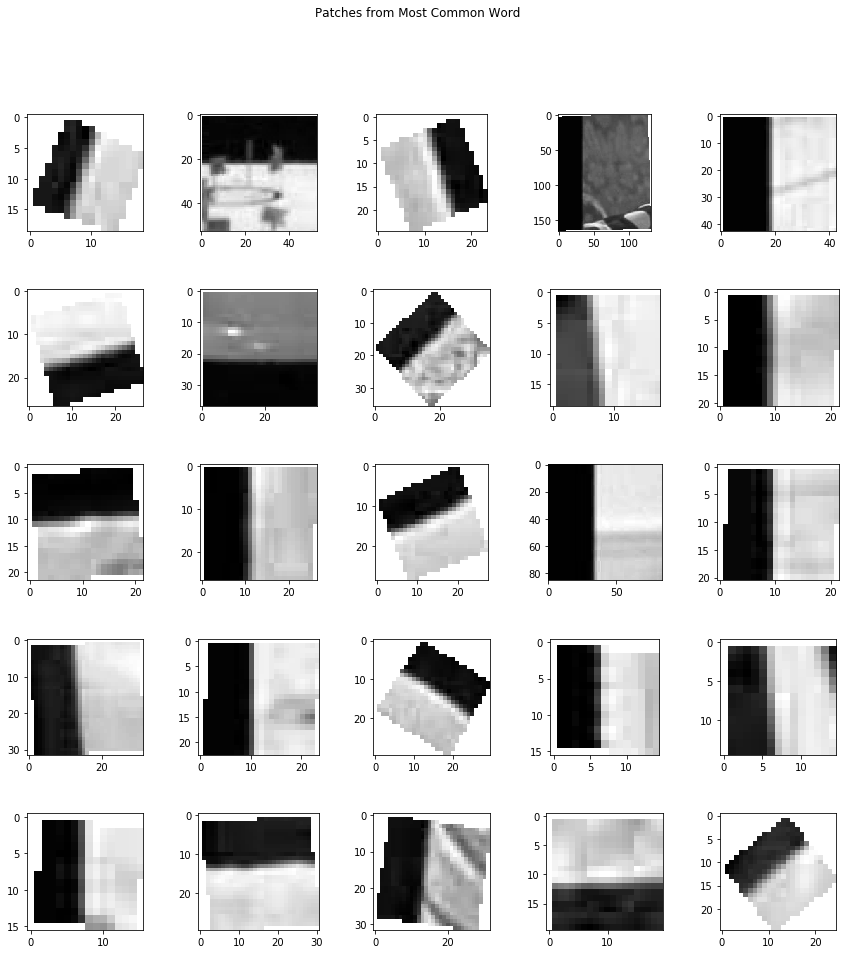

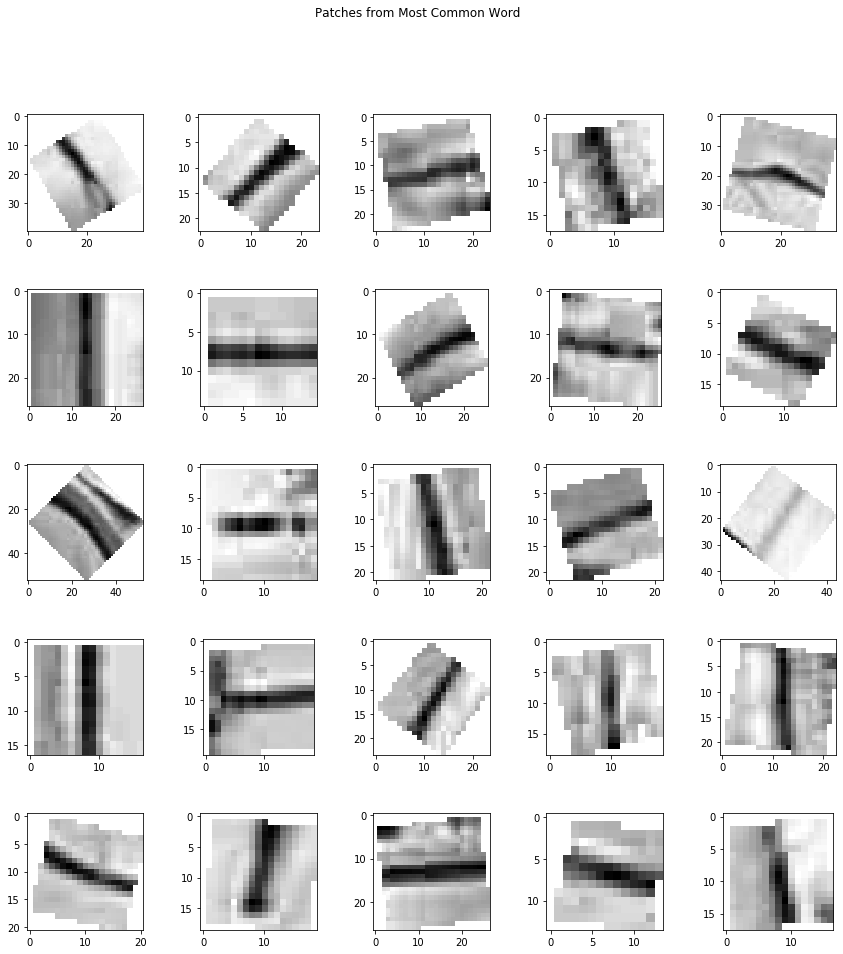

In [82]:
for i in range(top_n):
    
    fig, axes = plt.subplots(nrows=5, ncols=5)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle('Patches from Most Common Word')

    for ax, patch in zip(axes.flatten(), patches[i]):
        ax.imshow(patch, cmap='gray')
        #ax.set(title=name[:-4].upper(), xlabel='cm')

In [78]:
top_positions[n][patch_idxs[n][i]]

array([461.6 , 358.89])

In [72]:
[[] for i in range(5]

[[], [], [], [], []]

In [18]:
label1_desc = descriptors[batch_kmeans.labels_ == label1]
label1_orients = orients[batch_kmeans.labels_ == label1]
label1_positions = positions[batch_kmeans.labels_ == label1]
label1_scales = scales[batch_kmeans.labels_ == label1]
label1_images = images[batch_kmeans.labels_ == label1]

In [19]:
label2_desc = descriptors[batch_kmeans.labels_ == label2]
label2_orients = orients[batch_kmeans.labels_ == label2]
label2_positions = positions[batch_kmeans.labels_ == label2]
label2_scales = scales[batch_kmeans.labels_ == label2]
label2_images = images[batch_kmeans.labels_ == label2]

In [20]:
label1_idxs = np.random.choice(len(label1_desc), 25)
label2_idxs = np.random.choice(len(label2_desc), 25)

In [21]:
label1_patches = []
label2_patches = []

for i in range(25):
    
    imname = frames_dir + label1_images[label1_idxs[i]]
    im = io.imread(imname)
    img_patch = getPatchFromSIFTParameters(label1_positions[label1_idxs[i]], label1_scales[label1_idxs[i]], 
                                           label1_orients[label1_idxs[i]], rgb2gray(im))
    label1_patches.append(img_patch)
    
    imname = frames_dir + label2_images[label2_idxs[i]]
    im = io.imread(imname)
    img_patch = getPatchFromSIFTParameters(label2_positions[label2_idxs[i]], label2_scales[label2_idxs[i]], 
                                           label2_orients[label2_idxs[i]], rgb2gray(im))
    label2_patches.append(img_patch)

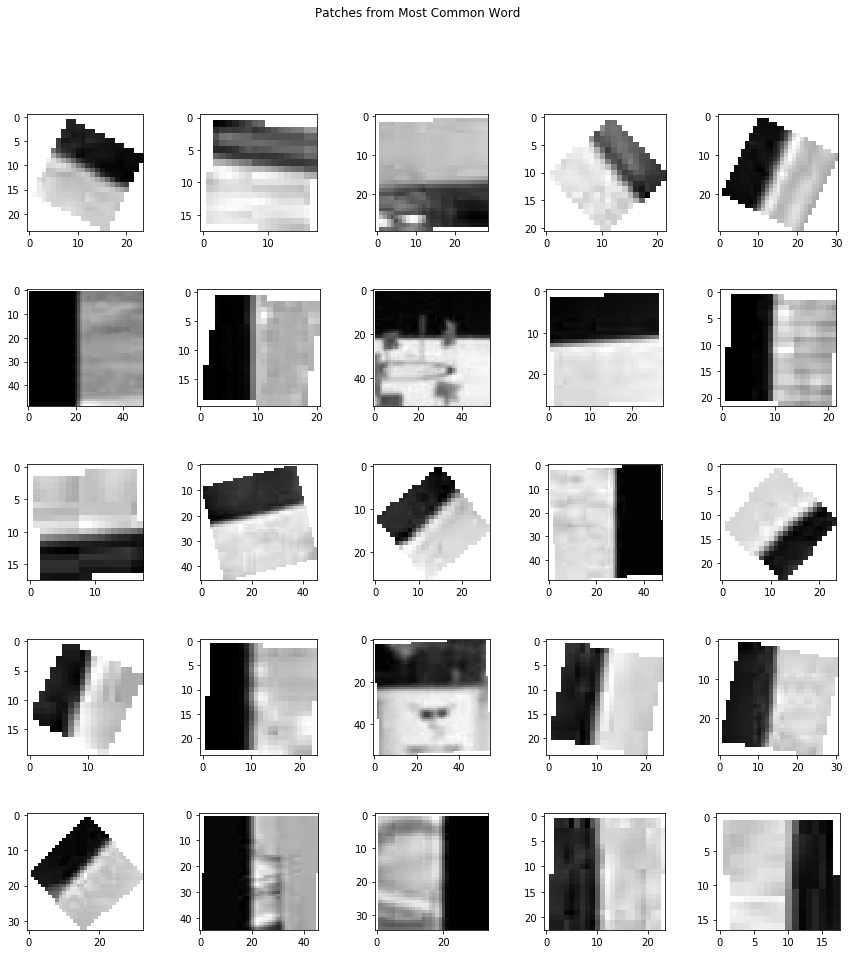

In [27]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Patches from Most Common Word')

for ax, patch in zip(axes.flatten(), label1_patches):
    ax.imshow(patch, cmap='gray')
    #ax.set(title=name[:-4].upper(), xlabel='cm')

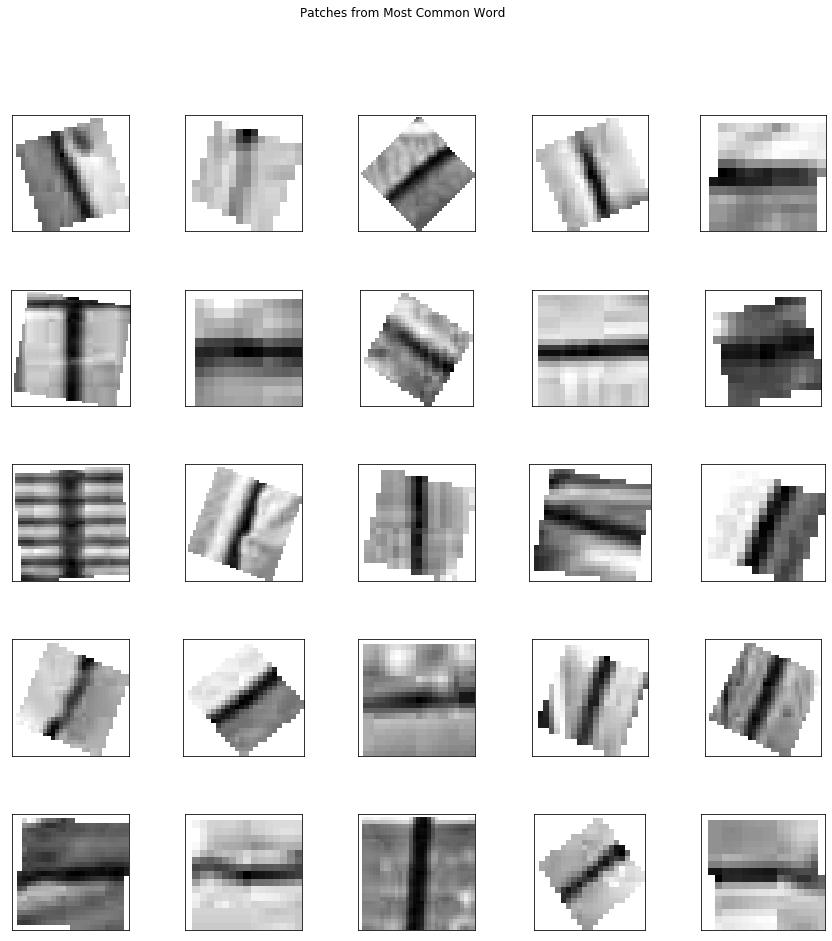

In [30]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Patches from Most Common Word')

for ax, patch in zip(axes.flatten(), label2_patches):
    ax.imshow(patch, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set(title=name[:-4].upper(), xlabel='cm')

In [ ]:
ax.set_yticks

In [ ]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221, xticks=[], yticks=[])
plt.subplot(ax1)
ax1.imshow(im)

ax2 = fig.add_subplot(222, xticks=[], yticks=[])
plt.subplot(ax2)
ax2.imshow(ei, cmap=cmap)

ax3 = fig.add_subplot(223, xticks=[], yticks=[])
plt.subplot(ax3)
ax3.imshow(vcmem, cmap=cmap)

ax4 = fig.add_subplot(224, xticks=[], yticks=[])
plt.subplot(ax4)
ax4.imshow(hcmem, cmap=cmap)

In [51]:
def get_rows_cols(n):
    
    cols = [i for i in range(1, int(np.sqrt(n)) + 1) if n % i == 0][-1]
    rows = n // cols
    
    return rows, cols

In [53]:
for i in range(1, 50):
    print(get_rows_cols(i))

(1, 1)
(2, 1)
(3, 1)
(2, 2)
(5, 1)
(3, 2)
(7, 1)
(4, 2)
(3, 3)
(5, 2)
(11, 1)
(4, 3)
(13, 1)
(7, 2)
(5, 3)
(4, 4)
(17, 1)
(6, 3)
(19, 1)
(5, 4)
(7, 3)
(11, 2)
(23, 1)
(6, 4)
(5, 5)
(13, 2)
(9, 3)
(7, 4)
(29, 1)
(6, 5)
(31, 1)
(8, 4)
(11, 3)
(17, 2)
(7, 5)
(6, 6)
(37, 1)
(19, 2)
(13, 3)
(8, 5)
(41, 1)
(7, 6)
(43, 1)
(11, 4)
(9, 5)
(23, 2)
(47, 1)
(8, 6)
(7, 7)


In [ ]:
math.i

In [49]:
n = 18


[1, 2, 3]

In [39]:
np.i
np.sqrt(26) - np.floor(np.sqrt(26))

0.09901951359278449

In [ ]:
img_patch = getPatchFromSIFTParameters(mat['positions'][patch_num,:], mat['scales'][patch_num], mat['orients'][patch_num], rgb2gray(im))

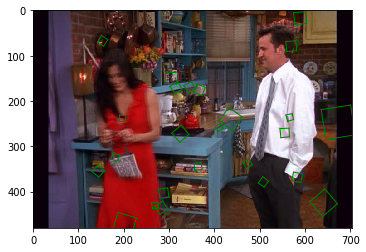

In [224]:
fig=plt.figure()
bx=fig.add_subplot(111)
bx.imshow(im)
coners = displaySIFTPatches(label1_positions[label1_idxs], label1_scales[label1_idxs], label1_orients[label1_idxs])

for j in range(len(coners)):
    bx.plot([coners[j][0][1], coners[j][1][1]], [coners[j][0][0], coners[j][1][0]], color='g', linestyle='-', linewidth=1)
    bx.plot([coners[j][1][1], coners[j][2][1]], [coners[j][1][0], coners[j][2][0]], color='g', linestyle='-', linewidth=1)
    bx.plot([coners[j][2][1], coners[j][3][1]], [coners[j][2][0], coners[j][3][0]], color='g', linestyle='-', linewidth=1)
    bx.plot([coners[j][3][1], coners[j][0][1]], [coners[j][3][0], coners[j][0][0]], color='g', linestyle='-', linewidth=1)

bx.set_xlim(0, im.shape[1])
bx.set_ylim(0, im.shape[0])
plt.gca().invert_yaxis()
plt.show()

In [146]:
np.zeros((1, 28)).append(mat['descriptors'][descriptor_idxs])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [157]:
descriptors = np.append(descriptors, mat['descriptors'][descriptor_idxs], axis=0)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07460667, 0.06479001, 0.00785333, ..., 0.00392667, 0.        ,
        0.01570667],
       [0.01568257, 0.        , 0.        , ..., 0.        , 0.00392064,
        0.13526214],
       ...,
       [0.00590815, 0.00590815, 0.03544887, ..., 0.00196938, 0.05514269,
        0.08862218],
       [0.11191972, 0.        , 0.        , ..., 0.00392701, 0.01767153,
        0.0019635 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00785606,
        0.07463257]])

In [158]:
np.append?

In [122]:
descriptor_idxs = np.random.choice(len(mat['descriptors']), 500, replace=False)

array([[0.        , 0.00787403, 0.05314971, ..., 0.        , 0.        ,
        0.        ],
       [0.19039712, 0.06869999, 0.        , ..., 0.        , 0.        ,
        0.00196286],
       [0.        , 0.        , 0.02360609, ..., 0.        , 0.03540914,
        0.0078687 ],
       ...,
       [0.1275432 , 0.02747084, 0.        , ..., 0.07652592, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00785729, ..., 0.        , 0.        ,
        0.01178593],
       [0.00393662, 0.03542957, 0.25588023, ..., 0.        , 0.03936619,
        0.01968309]])

In [61]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'descriptors', 'orients', 'scales', 'positions', 'numfeats', 'corners', 'imname'])

In [62]:
mat['descriptors'][i]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00196724, 0.02360682,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07475493, 0.0393447 , 0.        , 0.        ,
       0.        , 0.00196724, 0.00983618, 0.04327917, 0.23016651,
       0.08655834, 0.00393447, 0.        , 0.        , 0.        ,
       0.09836176, 0.18885457, 0.06491876, 0.09246005, 0.        ,
       0.        , 0.        , 0.01573788, 0.00393447, 0.        ,
       0.09246005, 0.10032899, 0.00983618, 0.00196724, 0.03541023,
       0.12787028, 0.00983618, 0.00590171, 0.25377333, 0.09246005,
       0.00196724, 0.        , 0.00393447, 0.01770512, 0.08459111,
       0.17901839, 0.25377333, 0.12983752, 0.00786894, 0.00196724,
       0.00786894, 0.033443  , 0.13180475, 0.1455754 , 0.14754263,
       0.25377333, 0.        , 0.        , 0.        , 0.00393447,
       0.00196724, 0.        , 0.20262522, 0.25377333, 0.     

In [63]:
mat['orients'][i]

array([-0.574])

In [64]:
mat['scales'][i]

array([43.87])

In [65]:
mat['positions'][i]

array([187.62, 118.23])

In [66]:
mat['numfeats']

array([[2081]], dtype=uint16)

In [67]:
mat['corners'][0][i]

array([[  91,  644,  284, -268],
       [ 574,  215, -338,   22]], dtype=int16)

In [68]:
corners = displaySIFTPatches(mat['positions'], mat['scales'], mat['orients'])

In [69]:
mat['corners'][0][i][0][1], mat['corners'][0][i][0][2], mat['corners'][0][i][1][3], mat['corners'][0][i][1][0]

(644, 284, 22, 574)

In [70]:
corners[i][0][1], corners[i][1][1], corners[i][0][0], corners[i][1][0]

(array([644.]), array([284.]), array([22.]), array([574.]))

In [71]:
corners[i][1][1], corners[i][2][1], corners[i][1][0], corners[i][2][0]

(array([284.]), array([-268.]), array([574.]), array([215.]))

In [72]:
corners[i][2][1], corners[i][3][1], corners[i][2][0], corners[i][3][0]

(array([-268.]), array([91.]), array([215.]), array([-338.]))

In [73]:
corners[i][3][1], corners[i][0][1], corners[i][3][0], corners[i][0][0]

(array([91.]), array([644.]), array([-338.]), array([22.]))

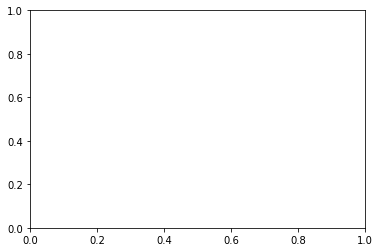

In [74]:
fig=plt.figure()
ax=fig.add_subplot(111)

In [75]:
ax.plot?

In [76]:
mat = scipy.io.loadmat('twoFrameData.mat')

In [78]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'im1', 'im2', 'positions1', 'orients1', 'scales1', 'descriptors1', 'positions2', 'orients2', 'scales2', 'descriptors2'])

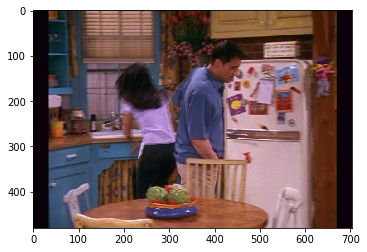

In [79]:
mat = scipy.io.loadmat('twoFrameData.mat')
fig=plt.figure()
ax=fig.add_subplot(111)
ax.imshow(mat['im1'])
MyROI = roipoly(roicolor='r')

In [81]:
np.save?

In [82]:
descriptors = np.load('descriptors.npy')

In [85]:
descriptors

array([[0.01376457, 0.        , 0.        , ..., 0.00393274, 0.01573094,
        0.12584754],
       [0.        , 0.00784552, 0.03726622, ..., 0.00784552, 0.03138208,
        0.05099588],
       [0.        , 0.00393704, 0.01377963, ..., 0.        , 0.01181112,
        0.04724446],
       ...,
       [0.04724034, 0.02165182, 0.        , ..., 0.02362017, 0.        ,
        0.        ],
       [0.0334134 , 0.        , 0.00196549, ..., 0.        , 0.        ,
        0.01375846],
       [0.05701078, 0.        , 0.        , ..., 0.21821367, 0.04718133,
        0.        ]])

In [93]:
mat['descriptors2'].shape

(1723, 128)

In [ ]:
clusters = np.argmin(np.sum((image_values - means[:, None])**2, axis=2), axis=0) 

In [89]:
from dist2 import dist2

In [97]:
dist2(descriptors, mat['descriptors2'])

array([[1.13417598, 0.55936352, 0.73541147, ..., 1.19841199, 1.30967873,
        1.23930092],
       [0.72635247, 1.37435229, 1.23657929, ..., 1.35087406, 1.03528008,
        1.26567348],
       [0.72889808, 1.32735911, 1.1558379 , ..., 1.29601365, 0.97488944,
        1.17336498],
       ...,
       [0.8409508 , 1.19502095, 0.78042551, ..., 0.89098868, 1.13316233,
        1.20057024],
       [1.41893315, 1.08917821, 1.37567202, ..., 1.0467642 , 1.62736929,
        1.39926989],
       [1.21244171, 1.24058226, 1.04723079, ..., 1.15797447, 1.31249692,
        1.55107397]])

In [92]:
descriptors.shape

(261, 128)

In [101]:
match_idxs = np.argmin(np.sum((descriptors - mat['descriptors2'][:, None])**2, axis=2), axis=0)

array([ 481, 1320, 1320,  753, 1477, 1068,  703,   45, 1104, 1717,   98,
         99,   69,  156,  471,  620,  107,  231,  150,  237,  158,   33,
        165, 1346,  246,  251, 1413,   69,  856,  233,  328,  330,  331,
          8,  239,  240,  333,  736,  338,  101,  244,  243, 1007,  359,
        251,  546,  321,  327,  447,  332,  464,  479, 1026,  484,  345,
        346,  360,  425, 1640, 1095,  771,  668,  669,  457,  682,  468,
        623,  476,  478,  688,   93,  287,  259, 1092,  494, 1038,  943,
        503, 1005,  442,  661,  936,  792,  793,  673,  675,  237,  680,
        685,  692, 1353,  974, 1600,  698, 1315, 1674, 1023,  225,  905,
        906,  229,  919,  929, 1136, 1243, 1154, 1223,  940, 1110, 1645,
       1238,  947,  211,  858,  699, 1639,  142, 1608,  919,  685,  344,
        993, 1234,   72,  292,  534,   93,  892, 1597,  892, 1224, 1137,
       1108, 1119,  920, 1233, 1154, 1110,  438, 1625, 1264, 1601, 1600,
        244,  981, 1291,  984,  512,  176, 1247,  2

In [102]:
mat['corners2'][match_idxs]

KeyError: 'corners2'

In [104]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'im1', 'im2', 'positions1', 'orients1', 'scales1', 'descriptors1', 'positions2', 'orients2', 'scales2', 'descriptors2'])